### **Exploratory Data Analysis**

**Dataset:** `Telco customer churn prediction`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('../datasets/raw/Telco-customer-churn-init-dataset.csv') 

In [4]:
dataset.shape

(7043, 21)

#### **Column Overview**
- **CustomerID** - Unique ID 
- **Gender** - Gender of the customer 
- **SeniorCitizen** - Wether the customer is a senior citizen (1,0)
- **Partner** - Whether the customer has a partner (Yes,No) 
- **Dependents** - Whether the customer has dependents (Yes,No)  
- **Tenure** - Number of months the customer has stayed with the company
- **PhoneService** - Whether the customer has a phone service (Yes,No)
- **MultipleLines** - Whether the customer has mutliple lines (Yes,No,No phone services)
- **InternetService** - Customer's ISP (DSL,Fiber Optic, No)
- **OnlineSecurity** - Whether the customer has online security (Yes,No,No internet service) 
- **OnlineBackup** - Whether the customer has online backup (Yes,No,No internet service) 
- **DeviceProtection** - Whether the customer has device protection (Yes,No,No internet service) 
- **TechSupport** - Whether the customer has tech support (Yes,No,No internet service) 
- **StreamingTV** - Whether the customer has streaming TV (Yes,No,No internet service) 
- **StreamingMovies** - Whether the customer has streaming movies (Yes,No,No internet service) 
- **Contract** - The contract term of the customer (Month-to-Month,One Year,Two Year)
- **PaperlessBilling** - Whether the customer has paperless billing or not (Yes,No)
- **PaymentMethod** - The customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges** - The amount charged to the customer monthly
- **TotalCharges** - The total amount charged to the customer 
- **Churn** - Whether the customer churned or not     

#### **Shape of the initial dataset**
- **Rows:** `7043`
- **Features:** `20 + Target_variable` 

In [5]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


---
#### **Column - `CustomerID`**

In [6]:
dataset['customerID'].isnull().sum()

np.int64(0)

In [7]:
dataset['customerID'].value_counts()

customerID
7590-VHVEG    1
5575-GNVDE    1
3668-QPYBK    1
7795-CFOCW    1
9237-HQITU    1
             ..
6840-RESVB    1
2234-XADUH    1
4801-JZAZL    1
8361-LTMKD    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

In [8]:
dataset['customerID'].unique()

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], shape=(7043,), dtype=object)

In [9]:
(dataset['customerID'].str.contains('-')).sum()

np.int64(7043)

#### **Column Report - `CustomerID`**
- **Missing Values** No missing values
- **Format** All the values have a proper format (include '-')
- **Empty Strings:** No empty strings
- **Unique Values:** A total of `7043` unique customer IDs
- **Data Type:** Object (String)
- **Usefulness:** Not useful for modeling / prediction. Should be `dropped`.
---

#### **Column - `Gender`**

In [10]:
dataset['gender'].head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: gender, dtype: object

In [11]:
dataset['gender'].isnull().sum()

np.int64(0)

In [12]:
dataset['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [13]:
(3555 + 3488) == 7043

True

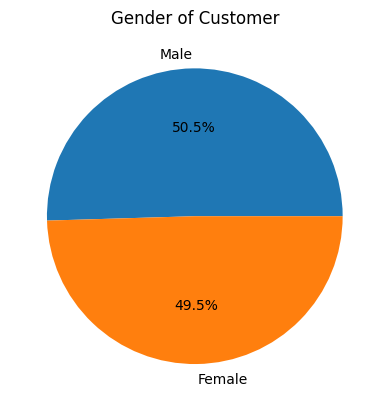

In [14]:
plt.pie(x=[3555,3488],labels=['Male','Female'],autopct='%1.1f%%')
plt.title("Gender of Customer")
plt.show()

In [15]:
dataset['gender'].unique()

array(['Female', 'Male'], dtype=object)

#### **Column Report - `Gender`**
- **Missing Values:** No missing values
- **Unique Values:** 2 Unique values - `Male` and `Female`
- **Null Values:** No null values
- **Format** All title-cased
- **Empty Strings:** None
- **Data Type:** Object (String)
- **Usefulness:** No immediate reason to believe gender affects churn rate, will assess during correlation interpretation    
- **Encoding:** Should be `binary encoded (1,0)`  
- **Imbalance:** No imbalance observed  
---

In [16]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### **Column - `SeniorCitizen`**

In [17]:
dataset['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [18]:
dataset['SeniorCitizen'].unique()

array([0, 1])

In [19]:
(5901 + 1142) == 7043

True

In [20]:
dataset['SeniorCitizen'].isnull().sum()

np.int64(0)

In [21]:
dataset['SeniorCitizen'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: SeniorCitizen
Non-Null Count  Dtype
--------------  -----
7043 non-null   int64
dtypes: int64(1)
memory usage: 55.2 KB


In [22]:
(5901 / 7043) * 100

83.78531875621185

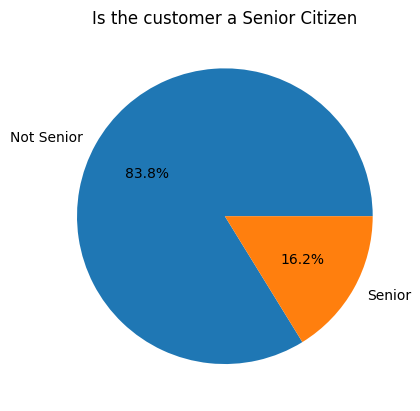

In [23]:
plt.pie([5901,1142],labels=['Not Senior','Senior'],autopct='%1.1f%%')
plt.title("Is the customer a Senior Citizen")
plt.show()

#### **Column Report - `SeniorCitizen`**
- **Missing Values:** No missing values
- **Unique Values:** 2 Unique values - `0 (Not Senior)`, `1 (Senior)` 
- **Null Values:** No null values
- **Data Type:**  integer
- **Usefulness:** Could potentially affect the churn rate, further assumptions should be made during future processes     
- **Imbalanced:** `0 (Not Senior)`  heavily dominates the dataset with it being `~83.78%`   
---

#### **Column - `Partner`**

In [24]:
dataset['Partner'].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

In [25]:
(3641 + 3402) == 7043

True

In [26]:
dataset['Partner'].isnull().sum()

np.int64(0)

In [27]:
dataset['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [28]:
dataset['Partner'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Partner
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


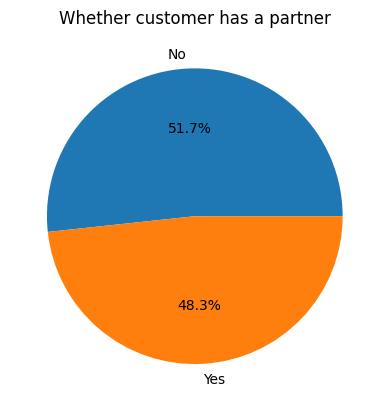

In [29]:
plt.pie(x=[3641,3402],labels=['No','Yes'],autopct='%1.1f%%')
plt.title('Whether customer has a partner')
plt.show()

In [30]:
(dataset['Partner'] == '').sum()

np.int64(0)

#### **Column Report - `Partner`**
- **Missing Values:** No missing values
- **Unique Values:** 2 Unique values - `Yes (Has a partner)`, `No (Doesn't have a partner)` 
- **Null Values:** No null values
- **Data Type:**  Object (String)
- **Encoding:** Has to be binary encoded (0,1) 
- **Usefulness:** Not sure as of now, would wait for further analysis to make a decision     
- **Imbalanced:** No imbalance  
---

In [31]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### **Column - `Dependents`**

In [32]:
dataset['Dependents'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Dependents
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [33]:
dataset['Dependents'].value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

In [34]:
(4933 + 2110) == 7043

True

In [35]:
dataset['Dependents'].isnull().sum()

np.int64(0)

In [36]:
dataset['Dependents'].dtype

dtype('O')

In [37]:
dataset['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

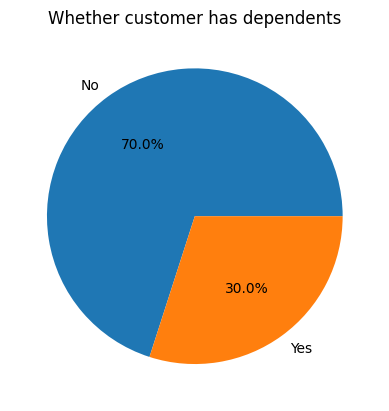

In [38]:
plt.pie([4933,2110],labels=['No','Yes'],autopct='%1.1f%%')
plt.title('Whether customer has dependents')
plt.show()

In [39]:
(dataset['Dependents'] == '').sum()

np.int64(0)

#### **Column Report - `Dependents`**
- **Missing Values:** No missing values
- **Unique Values:** 2 Unique values - `Yes (Has dependents)`, `No (Doesn't have dependents)` 
- **Null Values:** No null values
- **Data Type:**  Object (String)
- **Encoding:** Has to be binary encoded (0,1) 
- **Usefulness:** Potentially influences churn (considering children and elders watch TV,movies,internet)      
- **Imbalanced:** There's a `70-30` imbalance with `70%` having no dependents   
---

#### **Column - `Tenure`**

In [40]:
dataset['tenure'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: tenure
Non-Null Count  Dtype
--------------  -----
7043 non-null   int64
dtypes: int64(1)
memory usage: 55.2 KB


In [41]:
dataset['tenure'].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

In [42]:
dataset['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [43]:
dataset['tenure'].isnull().sum()

np.int64(0)

In [44]:
dataset['tenure'].dtype

dtype('int64')

In [45]:
dataset['tenure'].mean()

np.float64(32.37114865824223)

In [46]:
dataset['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

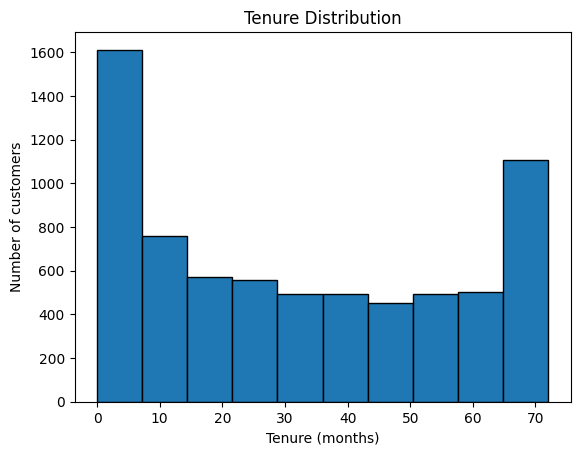

In [47]:
plt.hist(x=dataset['tenure'],bins=10,edgecolor='black')
plt.title("Tenure Distribution")
plt.xlabel('Tenure (months)')
plt.ylabel("Number of customers")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13844\3614523939.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset['tenure'],palette='pastel')


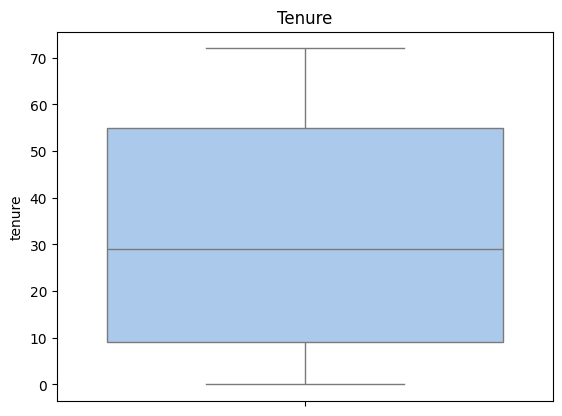

In [48]:
sns.boxplot(data=dataset['tenure'],palette='pastel')
plt.title('Tenure')
plt.show()

In [49]:
dataset[dataset['tenure'] > 60 ]['Churn'].value_counts() 

Churn
No     1314
Yes      93
Name: count, dtype: int64

In [50]:
tenure_counts = dataset.groupby('Churn')['tenure'].value_counts().unstack(fill_value=0)
tenure_counts

tenure,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
Churn,,,,,,,,,,,,,,,,,,,,,
No,11,233,115,106,93,69,70,80,81,73,...,68,76,67,76,88,91,87,108,164,356
Yes,0,380,123,94,83,64,40,51,42,46,...,4,4,9,13,10,9,8,11,6,6


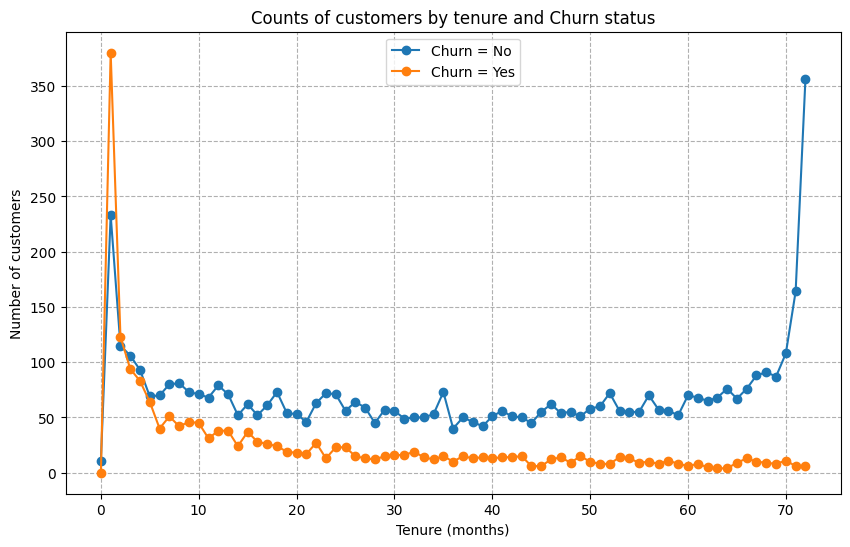

In [51]:
plt.figure(figsize=(10,6))

plt.plot(tenure_counts.columns,tenure_counts.loc['No'],label='Churn = No',marker='o')
plt.plot(tenure_counts.columns,tenure_counts.loc['Yes'],label='Churn = Yes',marker='o')

plt.title('Counts of customers by tenure and Churn status')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of customers')
plt.legend()
plt.grid(True,linestyle='--')
plt.show()

#### **Column Report - `Tenure`**
- **Missing Values:** No missing values
- **Null Values:** No null values
- **Data Type:**  integer
- **Standardization:** Needs to be standardized
- **Usefulness:** Influences churn rate the most      
- **Distribution Observations:**
    - Clusters at both extremes
    - Early tenure (< 5 months) show a spike in churn rate
    - Long tenure customers show a spike in non-churn rate 
- **Early churn suggests initial satisfaction issues**
- **Long tenure customers are more loyal**    
---

In [52]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### **Column - `PhoneService`**

In [53]:
dataset['PhoneService'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: PhoneService
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [54]:
dataset['PhoneService'].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

In [55]:
dataset['PhoneService'].isnull().sum()

np.int64(0)

In [56]:
(6361 + 682) == 7043

True

In [57]:
dataset['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

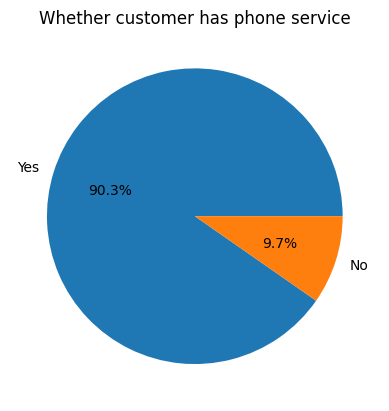

In [58]:
plt.pie(x=dataset['PhoneService'].value_counts(),labels=['Yes','No'],autopct='%1.1f%%')
plt.title("Whether customer has phone service")
plt.show()

In [59]:
cross_tab = pd.crosstab(dataset['PhoneService'],dataset['Churn'],normalize='index')
cross_tab

Churn,No,Yes
PhoneService,,
No,0.750733,0.249267
Yes,0.732904,0.267096


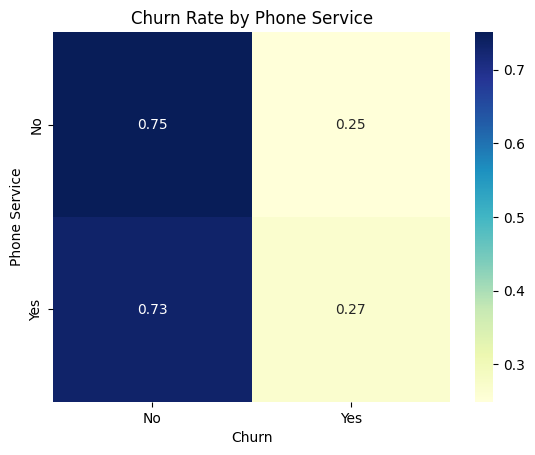

In [60]:
sns.heatmap(cross_tab,annot=True,cmap='YlGnBu',fmt='.2f')
plt.title('Churn Rate by Phone Service')
plt.ylabel('Phone Service')
plt.xlabel('Churn')
plt.show()

#### **Column Report - `PhoneService`**
- **Missing Values:** No missing values
- **Null Values:** No null values
- **Data Type:**  Object (String)
- **Encoding:** Needs to be binary encoded 
- **Usefulness:** Doesn't seem to have a significant impact on the churn rate as of this stage      
- **Distribution Observations:**
    - Highly imbalanced distribution with ~90% having a Phone Service 
    - The churn rate is not affected significantly by the availability of Phone Service 
---

In [61]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### **Column - `MultipleLines`**

In [62]:
dataset['MultipleLines'].head()

0    No phone service
1                  No
2                  No
3    No phone service
4                  No
Name: MultipleLines, dtype: object

In [63]:
dataset['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [64]:
dataset['MultipleLines'].value_counts().sum() == 7043  

np.True_

In [65]:
dataset['MultipleLines'].isnull().sum()

np.int64(0)

In [66]:
dataset['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

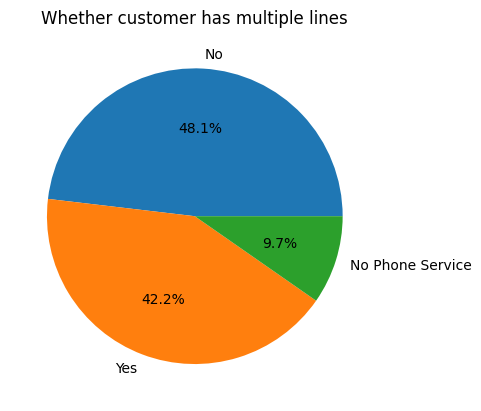

In [67]:
plt.pie(x=dataset['MultipleLines'].value_counts(),autopct='%1.1f%%',labels=['No','Yes','No Phone Service'])
plt.title("Whether customer has multiple lines")
plt.show()

In [68]:
dataset['MultipleLines'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: MultipleLines
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


#### **Column Report - `MultipleLines`**
- **Data Type:** Object (String)
- **Unique Values:** 3 unique values -> `['Yes','No','No Phone Service']`
- **Distribution Observations:**
    - `Yes` and `No` are almost evenly distributed
    - `No Phone Service` appears only when `PhoneService = No` 
- **Dependency:** This features is dependent on `PhoneService`      
- **Encoding:** 
    - One-Hot Encode `Yes` and `No`
    - Drop `No Phone Service` to avoid redundancy
---      

#### **Column - `InternetService`**

In [69]:
dataset['InternetService'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: InternetService
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [70]:
dataset['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

- **DSL:**
    - Older Infrastructure
    - Cheaper
    - Slower than Fiber
- **Fiber optic:**
    - Modern, expensive
    - Faster         

In [71]:
dataset['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [72]:
internet_churn = dataset.groupby('Churn')['InternetService'].value_counts(normalize=True).unstack(fill_value=0)
internet_churn

InternetService,DSL,Fiber optic,No
Churn,,,
No,0.379204,0.347700,0.273096
Yes,0.245586,0.693954,0.060460


In [73]:
dataset['InternetService'].isnull().sum()

np.int64(0)

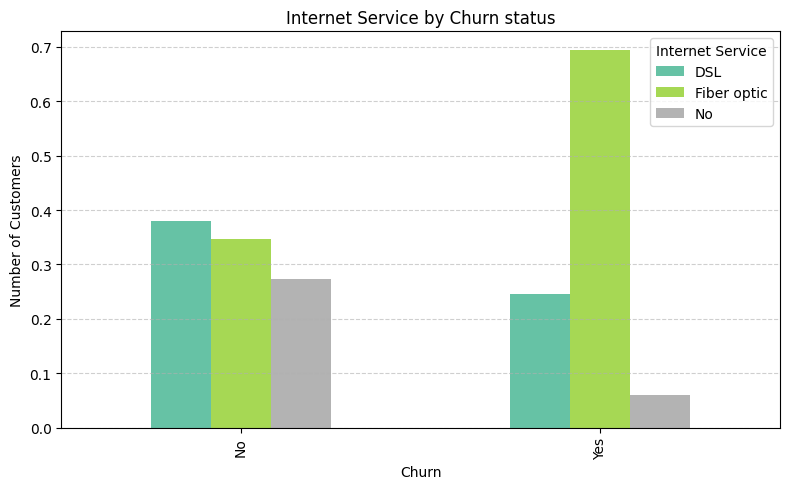

In [74]:
internet_churn.plot(kind='bar',figsize=(8,5),colormap='Set2')
plt.title("Internet Service by Churn status")
plt.xlabel("Churn")
plt.ylabel('Number of Customers')
plt.legend(title="Internet Service")
plt.grid(axis='y',linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

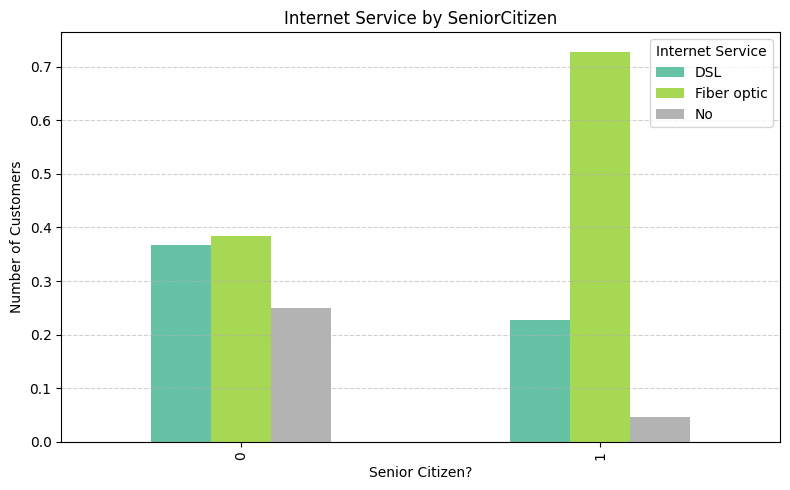

In [75]:
elder_internet = dataset.groupby('SeniorCitizen')['InternetService'].value_counts(normalize=True).unstack(fill_value=0)
elder_internet.plot(kind='bar',figsize=(8,5),colormap='Set2')
plt.title("Internet Service by SeniorCitizen")
plt.xlabel("Senior Citizen?")
plt.ylabel('Number of Customers')
plt.legend(title="Internet Service")
plt.grid(axis='y',linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

In [76]:
elder_internet

InternetService,DSL,Fiber optic,No
SeniorCitizen,,,
0,0.366379,0.383833,0.249788
1,0.226795,0.727671,0.045534


#### **Column Report - `InternetService`**
- **Data Type:** Object (String)
- **Unique Values:** 3 unique values ('DSL','Fiber Optic','No')
- **Missing Values:** No missing values
- **Usefulness:** There seems to be some correlation to Churn
- **Distribution Observations:**
    - Maximum customers have `Fiber Optic` suggesting wider urban presence of the company
    - Least amount of customers do not have InternetService
    - Maximum churn rate for the customers with `Fiber Optics`, suggests higher expectations or dissatisfaction
    - Customers with `No Internet` churn the least
- **Dependency:** Having no Internet Service is not dependent on customers being senior citizens     
- **Encoding:**
    - Split into 2 features -> `HasInternet` and `InternetServiceType`
    - Both the features being binary or One-Hot encoded   
---         

In [77]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### **Column - `OnlineSecurity`**

In [78]:
dataset['OnlineSecurity'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: OnlineSecurity
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [79]:
dataset['OnlineSecurity'].dtype

dtype('O')

In [80]:
dataset['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [81]:
dataset['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [82]:
dataset['OnlineSecurity'].value_counts().sum() == 7043

np.True_

In [83]:
security_churn = dataset.groupby('Churn')['OnlineSecurity'].value_counts(normalize=True).unstack(fill_value=0)
security_churn

OnlineSecurity,No,No internet service,Yes
Churn,,,
No,0.393699,0.273096,0.333204
Yes,0.781701,0.060460,0.157838


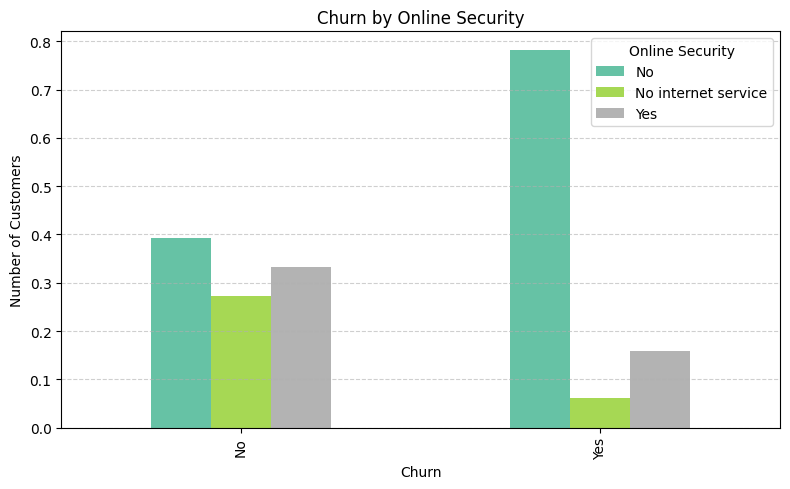

In [84]:
security_churn.plot(kind='bar',figsize=(8,5),colormap='Set2')
plt.title("Churn by Online Security")
plt.xlabel("Churn")
plt.ylabel('Number of Customers')
plt.legend(title="Online Security")
plt.grid(axis='y',linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

In [85]:
dataset.groupby('SeniorCitizen')['OnlineSecurity'].value_counts().unstack(fill_value=0)

OnlineSecurity,No,No internet service,Yes
SeniorCitizen,,,
0,2690,1474,1737
1,808,52,282


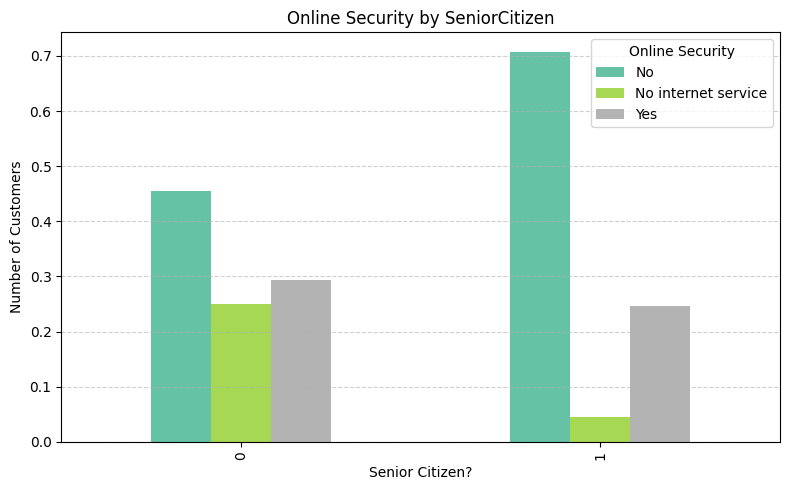

In [86]:
elder_security = dataset.groupby('SeniorCitizen')['OnlineSecurity'].value_counts(normalize=True).unstack(fill_value=0)

elder_security.plot(kind='bar',figsize=(8,5),colormap='Set2')
plt.title("Online Security by SeniorCitizen")
plt.xlabel("Senior Citizen?")
plt.ylabel('Number of Customers')
plt.legend(title="Online Security")
plt.grid(axis='y',linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

In [87]:
elder_security_churn = dataset.groupby(['SeniorCitizen','OnlineSecurity'])['Churn'].value_counts().unstack(fill_value=0)
elder_security_churn

Churn                                No   Yes
SeniorCitizen OnlineSecurity                 
0             No                   1636  1054
              No internet service  1366   108
              Yes                  1506   231
1             No                    401   407
              No internet service    47     5
              Yes                   218    64

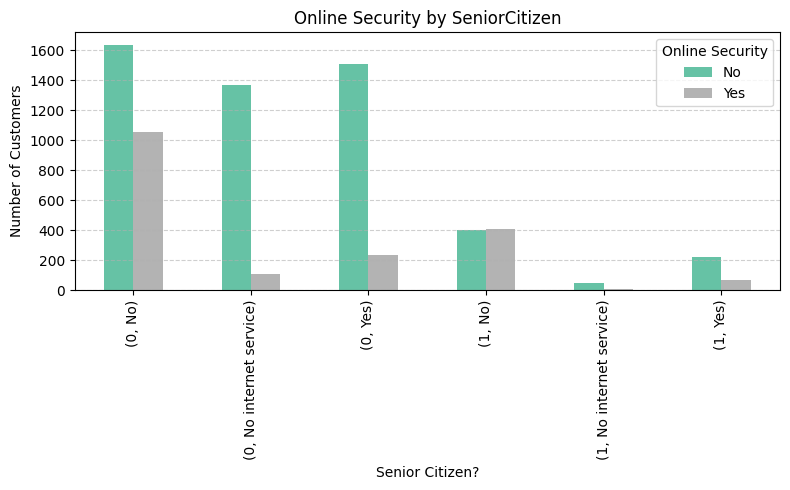

In [88]:
elder_security_churn.plot(kind='bar',figsize=(8,5),colormap='Set2')
plt.title("Online Security by SeniorCitizen")
plt.xlabel("Senior Citizen?")
plt.ylabel('Number of Customers')
plt.legend(title="Online Security")
plt.grid(axis='y',linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

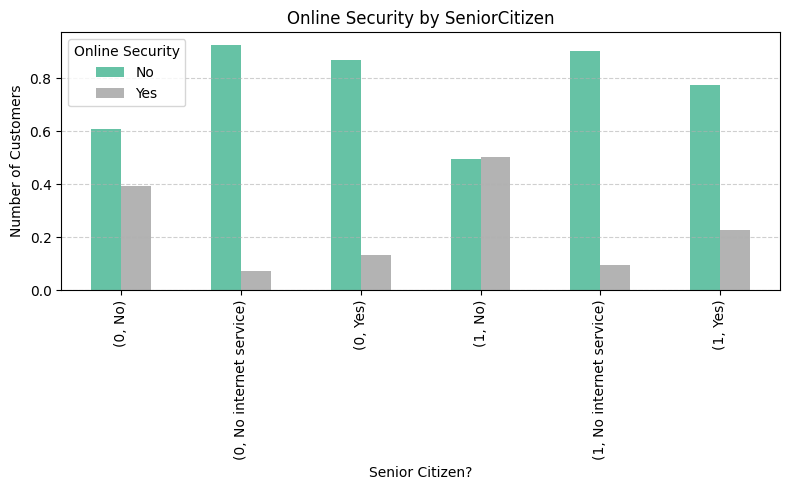

In [89]:
elder_security_churn = dataset.groupby(['SeniorCitizen','OnlineSecurity'])['Churn'].value_counts(normalize=True).unstack(fill_value=0)
elder_security_churn.plot(kind='bar',figsize=(8,5),colormap='Set2')
plt.title("Online Security by SeniorCitizen")
plt.xlabel("Senior Citizen?")
plt.ylabel('Number of Customers')
plt.legend(title="Online Security")
plt.grid(axis='y',linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

In [90]:
pd.DataFrame(dataset.groupby(['SeniorCitizen','OnlineSecurity'])['Churn'].value_counts(normalize=True)).unstack(fill_value=0)


proportion          
Churn                                     No       Yes
SeniorCitizen OnlineSecurity                          
0             No                    0.608178  0.391822
              No internet service   0.926730  0.073270
              Yes                   0.867012  0.132988
1             No                    0.496287  0.503713
              No internet service   0.903846  0.096154
              Yes                   0.773050  0.226950

#### **Column Report - `OnlineSecurity`**
- **Data Type:** Object (String)
- **Missing Values:** No missing values
- **Distribution Observations:**
    - Higher number of customers with `InternetService` do not have `OnlineSecurity`
    - These set of customers show a higher churn rate than others
    - Higher number of `SeniorCitizen` with `InternetService` do not have `OnlineSecurity`
    - A customer is less to churn with `OnlineSecurity` 
- **Encoding:** 
    - Drop the `No internet service` category
    - Binary encode `Yes` and `No` categories
    - There will be an imbalance after dropping the 3rd category
- **Dependency:** Dependent on customers having `InternetService`     
---

In [91]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### **Column - `OnlineBackup`**

In [92]:
dataset['OnlineBackup'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: OnlineBackup
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [93]:
dataset['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [94]:
dataset['OnlineBackup'].value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

In [95]:
dataset['OnlineBackup'].value_counts().sum() == 7043

np.True_

In [96]:
dataset['OnlineBackup'].isnull().sum()

np.int64(0)

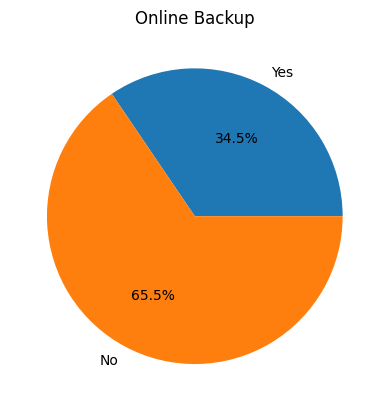

In [97]:
plt.pie(x=[2429,3088+1526],labels=['Yes','No'],autopct='%1.1f%%')
plt.title('Online Backup')
plt.show()

In [98]:
backup_churn = dataset.groupby('Churn')['OnlineBackup'].value_counts(normalize=True).unstack()
backup_churn

OnlineBackup,No,No internet service,Yes
Churn,,,
No,0.358523,0.273096,0.368380
Yes,0.659711,0.060460,0.279829


In [99]:
dataset.groupby('OnlineBackup')['SeniorCitizen'].value_counts().unstack()

SeniorCitizen,0,1
OnlineBackup,,
No,2474,614
No internet service,1474,52
Yes,1953,476


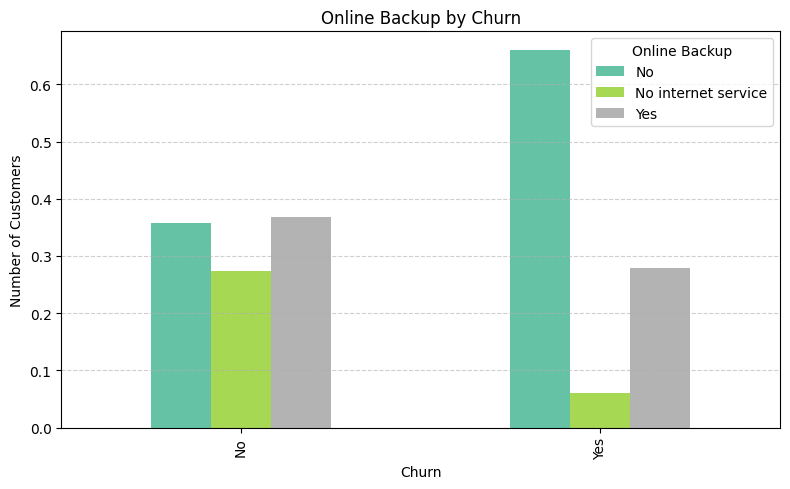

In [100]:
backup_churn.plot(kind='bar',figsize=(8,5),colormap='Set2')
plt.title("Online Backup by Churn")
plt.xlabel("Churn")
plt.ylabel('Number of Customers')
plt.legend(title="Online Backup")
plt.grid(axis='y',linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

In [101]:
elder_backup = dataset.groupby(['Churn','SeniorCitizen'])['OnlineBackup'].value_counts(normalize=True).unstack()
elder_backup

OnlineBackup               No  No internet service       Yes
Churn SeniorCitizen                                         
No    0              0.347161             0.303017  0.349823
      1              0.435435             0.070571  0.493994
Yes   0              0.652548             0.077531  0.269921
      1              0.680672             0.010504  0.308824

#### **Column Report - `OnlineBackup`**
- **Data Type:** Object (String)
- **Missing Values:** No missing values
- **Distribution Observations:**
    - Mild imbalance with `No` being prevalent (65-35)
    - People with `No Online Backup` tend to churn *more*
    - Be it senior citizen or some young customer  
    - No strong correlation with `SeniorCitizen`
- **Encoding:**
    - Drop the `No Internet Service` category
    - Binary encode the feature
- **Dependency:** Is dependent on `InternetService`      
---  

In [102]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### **Column - `DeviceProtection`**

In [103]:
dataset['DeviceProtection'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: DeviceProtection
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [104]:
dataset['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [105]:
dataset['DeviceProtection'].value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

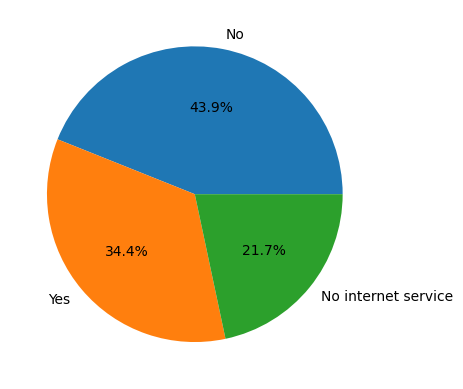

In [106]:
plt.pie(x=dataset['DeviceProtection'].value_counts(),autopct='%1.1f%%',labels=['No','Yes','No internet service'])
plt.show()

In [107]:
dataset['DeviceProtection'].value_counts().sum() == 7043

np.True_

In [108]:
dataset['DeviceProtection'].isnull().sum()

np.int64(0)

In [109]:
protection_churn = dataset.groupby('Churn')['DeviceProtection'].value_counts(normalize=True).unstack()
dataset.groupby('Churn')['DeviceProtection'].value_counts().unstack()

DeviceProtection,No,No internet service,Yes
Churn,,,
No,1884,1413,1877
Yes,1211,113,545


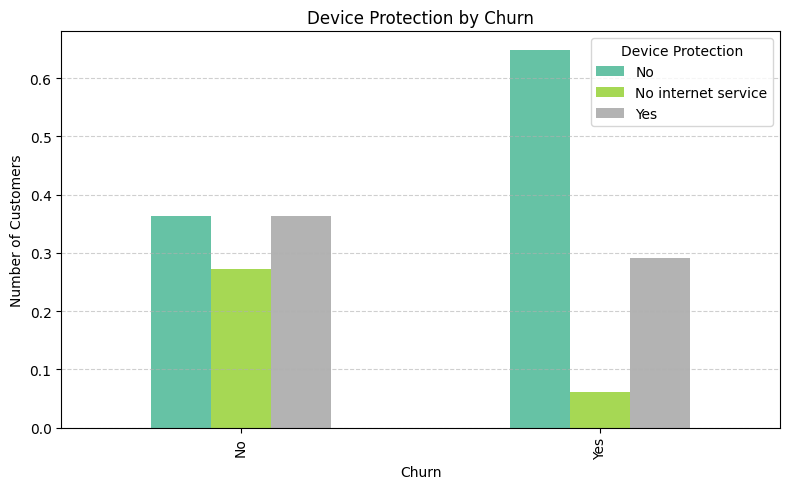

In [110]:
protection_churn.plot(kind='bar',figsize=(8,5),colormap='Set2')
plt.title("Device Protection by Churn")
plt.xlabel("Churn")
plt.ylabel('Number of Customers')
plt.legend(title="Device Protection")
plt.grid(axis='y',linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

In [111]:
dataset.groupby('SeniorCitizen')['DeviceProtection'].value_counts(normalize=True).unstack()

DeviceProtection,No,No internet service,Yes
SeniorCitizen,,,
0,0.418743,0.249788,0.331469
1,0.546410,0.045534,0.408056


In [112]:
dataset.groupby('OnlineSecurity')['DeviceProtection'].value_counts().unstack()

DeviceProtection,No,No internet service,Yes
OnlineSecurity,,,
No,2187.0,NaN,1311.0
No internet service,NaN,1526.0,NaN
Yes,908.0,NaN,1111.0


#### **Column Report - `DeviceProtection`**
- **Data Type:** Object (String)
- **Missing Values:** No missing values
- **Imbalance:** Mild imbalance with no `DeviceProtection` being *~65%*
- **Distribution Observations:**
    - Customers with no `DeviceProtection` are more likely to churn
    - Not significant correlation with customer being a `SeniorCitizen` 
    - High percentage of people having `OnlineSecurity` have `DeviceProtection` 
- **Encoding:** 
    - Drop the `no internet service` category
    - Binary encode the feature
---         

In [113]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### **Column - `TechSupport`**

In [114]:
dataset['TechSupport'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TechSupport
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [115]:
dataset['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [116]:
dataset['TechSupport'].value_counts()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

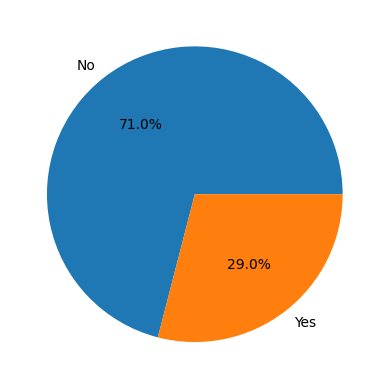

In [117]:
plt.pie(x=[3473+1526,2044],labels=['No','Yes'],autopct='%1.1f%%')
plt.show()

In [118]:
dataset['TechSupport'].isnull().sum()

np.int64(0)

In [119]:
support_churn = dataset.groupby('Churn')['TechSupport'].value_counts(normalize=True).unstack()
dataset.groupby('Churn')['TechSupport'].value_counts().unstack()

TechSupport,No,No internet service,Yes
Churn,,,
No,2027,1413,1734
Yes,1446,113,310


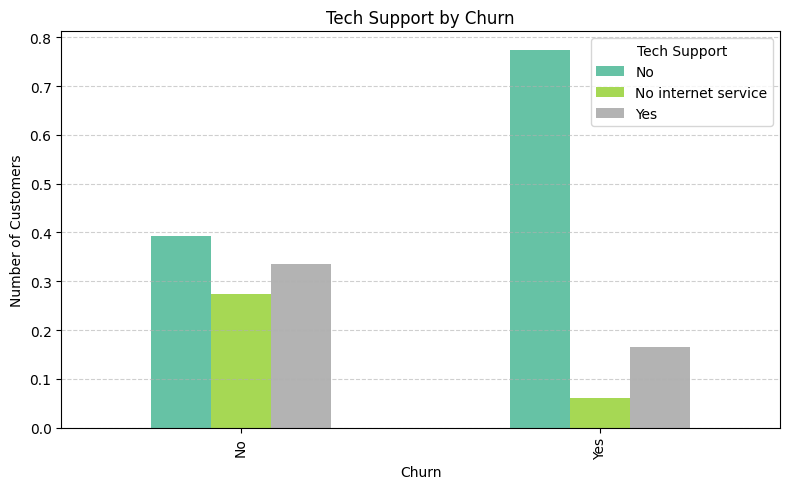

In [120]:
support_churn.plot(kind='bar',figsize=(8,5),colormap='Set2')
plt.title("Tech Support by Churn")
plt.xlabel("Churn")
plt.ylabel('Number of Customers')
plt.legend(title="Tech Support")
plt.grid(axis='y',linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

In [121]:
internet_support = dataset.groupby('InternetService')['TechSupport'].value_counts(normalize=True).unstack()
internet_support

TechSupport,No,No internet service,Yes
InternetService,,,
DSL,0.513424,NaN,0.486576
Fiber optic,0.720284,NaN,0.279716
No,NaN,1.0,NaN


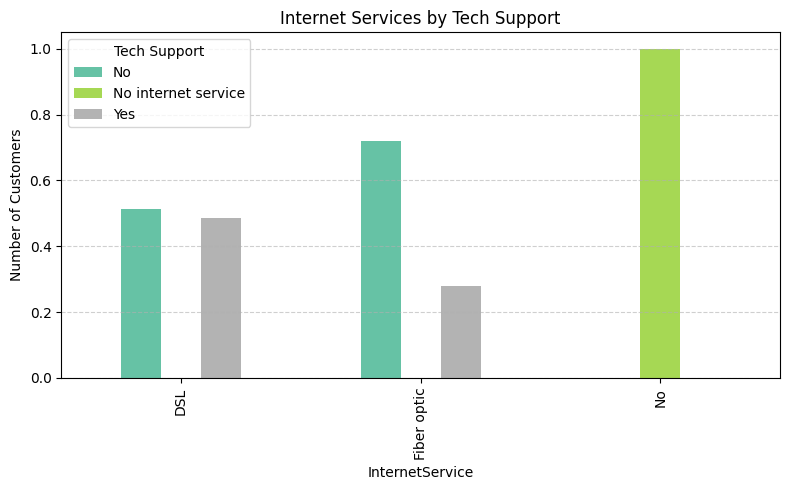

In [122]:
internet_support.plot(kind='bar',figsize=(8,5),colormap='Set2')
plt.title("Internet Services by Tech Support")
# plt.xlabel("")
plt.ylabel('Number of Customers')
plt.legend(title="Tech Support")
plt.grid(axis='y',linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

In [123]:
dataset.groupby(['InternetService','Churn'])['TechSupport'].value_counts(normalize=True).unstack()

TechSupport                  No  No internet service       Yes
InternetService Churn                                         
DSL             No     0.457696                  NaN  0.542304
                Yes    0.751634                  NaN  0.248366
Fiber optic     No     0.627571                  NaN  0.372429
                Yes    0.848882                  NaN  0.151118
No              No          NaN                  1.0       NaN
                Yes         NaN                  1.0       NaN

#### **Column Report - `TechSupport`**
- **Data Type:** Object (String)
- **Missing Values:** No missing values
- **Imbalance:** Imbalance with customers not having `TechSupport` dominate, being *~71%*
- **Distribution Observations:**
    - Customers with no `TechSupport` are more likely to churn
    - There's a pattern to the distribution for these internet related services (check for multicollinearity)
    - Higher churn rate for customers having `Fiber optic`  
- **Encoding:** 
    - Drop the 3rd category
    - Binary encode on the feature
- **Dependency:** This feature is dependent on `InternetService`    
---        

In [124]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### **Column - `StreamingTV`**

In [125]:
dataset.StreamingTV.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: StreamingTV
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [126]:
dataset['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [127]:
dataset['StreamingTV'].value_counts()

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

In [128]:
dataset['StreamingTV'].isnull().sum()

np.int64(0)

In [129]:
tv_churn = dataset.groupby('Churn')['StreamingTV'].value_counts(normalize=True).unstack()
dataset.groupby('Churn')['StreamingTV'].value_counts().unstack()

StreamingTV,No,No internet service,Yes
Churn,,,
No,1868,1413,1893
Yes,942,113,814


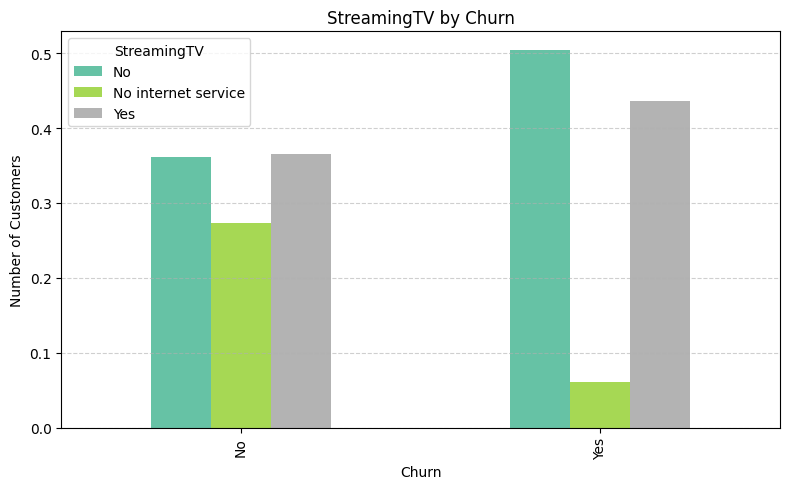

In [130]:
tv_churn.plot(kind='bar',figsize=(8,5),colormap='Set2')
plt.title("StreamingTV by Churn")
plt.xlabel("Churn")
plt.ylabel('Number of Customers')
plt.legend(title="StreamingTV")
plt.grid(axis='y',linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

In [131]:
elder_tv = dataset.groupby("SeniorCitizen")['StreamingTV'].value_counts(normalize=True).unstack()
dataset.groupby("SeniorCitizen")['StreamingTV'].value_counts().unstack()

StreamingTV,No,No internet service,Yes
SeniorCitizen,,,
0,2292,1474,2135
1,518,52,572


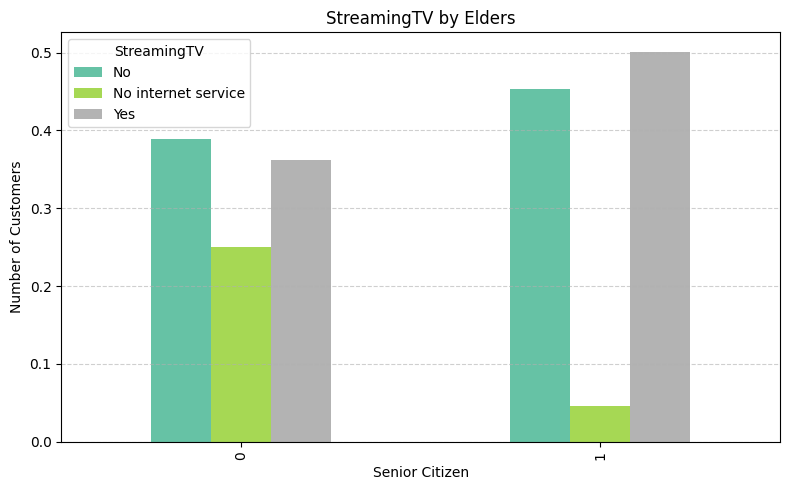

In [132]:
elder_tv.plot(kind='bar',figsize=(8,5),colormap='Set2')
plt.title("StreamingTV by Elders")
plt.xlabel("Senior Citizen")
plt.ylabel('Number of Customers')
plt.legend(title="StreamingTV")
plt.grid(axis='y',linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

In [133]:
internet_tv = dataset.groupby('InternetService')['StreamingTV'].value_counts(normalize=True).unstack()
dataset.groupby('InternetService')['StreamingTV'].value_counts().unstack()

StreamingTV,No,No internet service,Yes
InternetService,,,
DSL,1464.0,NaN,957.0
Fiber optic,1346.0,NaN,1750.0
No,NaN,1526.0,NaN


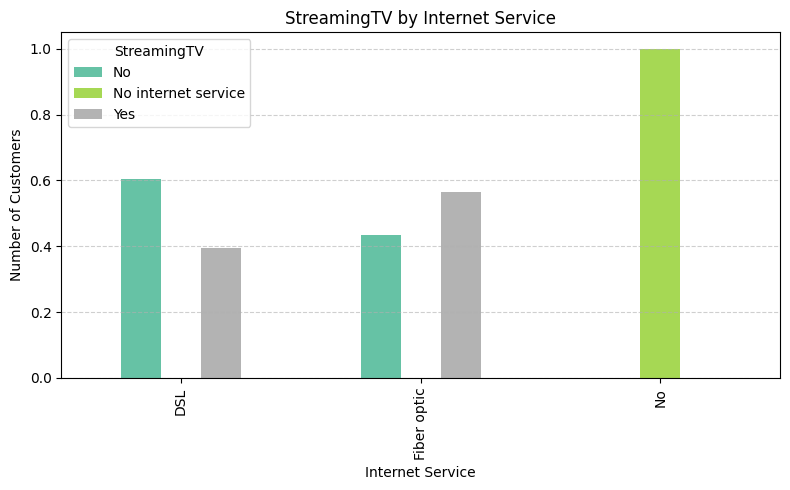

In [134]:
internet_tv.plot(kind='bar',figsize=(8,5),colormap='Set2')
plt.title("StreamingTV by Internet Service")
plt.xlabel("Internet Service")
plt.ylabel('Number of Customers')
plt.legend(title="StreamingTV")
plt.grid(axis='y',linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

#### **Column Report - `StreamingTV`**
- **Data Type:** Object (String)
- **Missing Values:** No missing values
- **Dependency:** Dependent on `InternetService`
- **Distribution Observations:**
    - The distribution is not imbalanced
    - The customers with or without `StreamingTV` are almost equally likely to churn (minimal correlation)
    - `StreamingTV` not correlated with `SeniorCitizen`
- **Encoding:**
    - Drop the 3rd category
    - Binary encode the feature      
---    

#### **Column - `StreamingMovies`**

In [135]:
dataset['StreamingMovies'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: StreamingMovies
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [136]:
dataset['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [137]:
dataset['StreamingMovies'].isnull().sum()

np.int64(0)

In [138]:
dataset['StreamingMovies'].value_counts()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

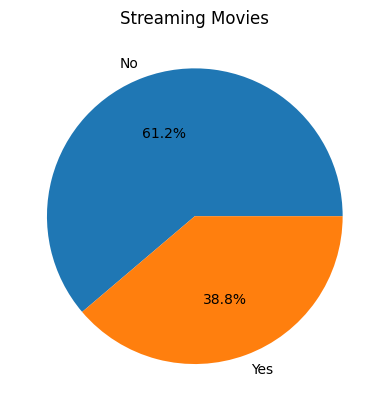

In [139]:
plt.pie(x=[2785+1526,2732],labels=['No','Yes'],autopct='%1.1f%%')
plt.title('Streaming Movies')
plt.show()

In [140]:
tv_movies = dataset.groupby('StreamingTV')['StreamingMovies'].value_counts(normalize=True).unstack()
dataset.groupby('StreamingTV')['StreamingMovies'].value_counts().unstack()

StreamingMovies,No,No internet service,Yes
StreamingTV,,,
No,2018.0,NaN,792.0
No internet service,NaN,1526.0,NaN
Yes,767.0,NaN,1940.0


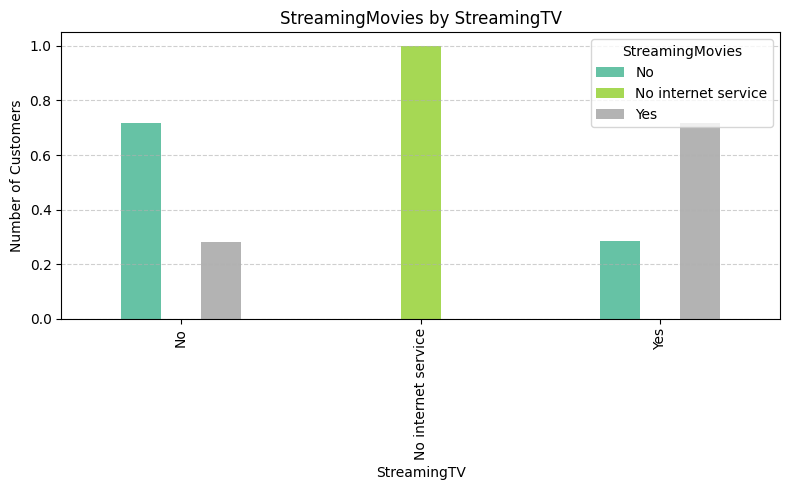

In [141]:
tv_movies.plot(kind='bar',figsize=(8,5),colormap='Set2')
plt.title("StreamingMovies by StreamingTV")
plt.xlabel("StreamingTV")
plt.ylabel('Number of Customers')
plt.legend(title="StreamingMovies")
plt.grid(axis='y',linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

In [142]:
churn_movies = dataset.groupby('Churn')['StreamingMovies'].value_counts(normalize=True).unstack()
dataset.groupby('Churn')['StreamingMovies'].value_counts().unstack()

StreamingMovies,No,No internet service,Yes
Churn,,,
No,1847,1413,1914
Yes,938,113,818


In [143]:
dataset.groupby('SeniorCitizen')['StreamingMovies'].value_counts().unstack()

StreamingMovies,No,No internet service,Yes
SeniorCitizen,,,
0,2290,1474,2137
1,495,52,595


#### **Column Report - `StreamingMovies`**
- **Data Type:** Object (String)
- **Missing Values:** No missing values
- **Dependancy:** Dependent on `InternetService` and slight dependence on `StreamingTV`
- **Distribution Observations:**
    - Mild imbalance, `No` being *~60%*
    - Customers with `StreamingTV` are more likely to have `StreamingMovies`
    - Customers without `StreamingTV` are less likely to have `StreamingMovies`
    - Not affected by whether a customer is a `SeniorCitizen`
- **Encoding:**
    - Drop the 3rd category
    - Binary encode the feature
---               

In [144]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### **Column - `Contract`**

In [145]:
dataset['Contract'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Contract
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [146]:
dataset['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [147]:
dataset['Contract'].isnull().sum()

np.int64(0)

In [148]:
dataset['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

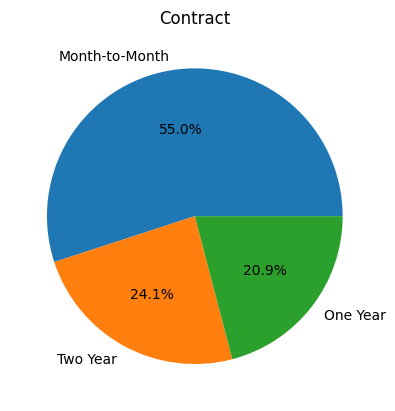

In [149]:
plt.pie(x=dataset['Contract'].value_counts(),labels=['Month-to-Month','Two Year','One Year'],autopct='%1.1f%%')
plt.title('Contract')
plt.show()

In [150]:
churn_contract=dataset.groupby('Churn')['Contract'].value_counts(normalize=True).unstack()
dataset.groupby('Churn')['Contract'].value_counts().unstack()

Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1307,1647
Yes,1655,166,48


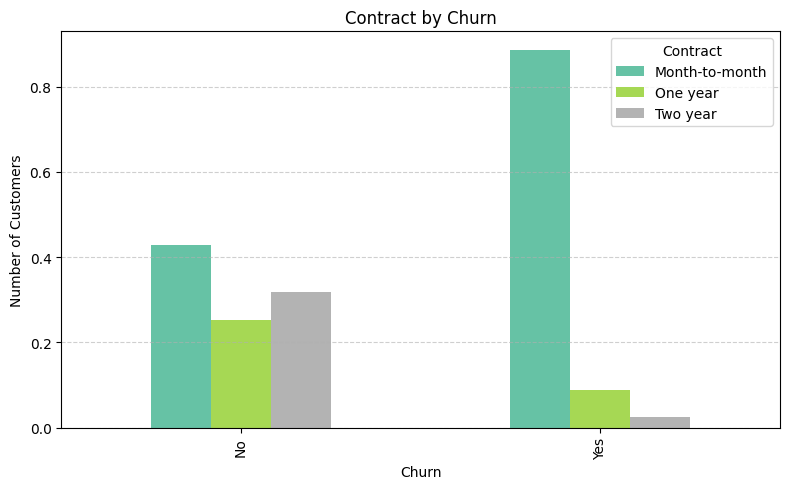

In [151]:
churn_contract.plot(kind='bar',figsize=(8,5),colormap='Set2')
plt.title("Contract by Churn")
plt.xlabel("Churn")
plt.ylabel('Number of Customers')
plt.legend(title="Contract")
plt.grid(axis='y',linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

In [152]:
internet_contract = dataset.groupby('InternetService')['Contract'].value_counts(normalize=True).unstack()
internet_contract

Contract,Month-to-month,One year,Two year
InternetService,,,
DSL,0.505163,0.235440,0.259397
Fiber optic,0.687339,0.174096,0.138566
No,0.343381,0.238532,0.418087


In [153]:
elder_contract = dataset.groupby('SeniorCitizen')['Contract'].value_counts(normalize=True).unstack()
elder_contract

Contract,Month-to-month,One year,Two year
SeniorCitizen,,,
0,0.519912,0.217421,0.262667
1,0.706655,0.166375,0.126970


#### **Column Report - `Contract`**
- **Data Type:** Object (String)
- **Unique Values:** `Month-to-Month`, `One Year`, `Two Year`
- **Missing Values:** No missing values
- **Distribution Observations:**
    - 55% customers have a monthly `Contract`
    - ~20% each have one and two year contracts
    - Customers with monthly contracts are the highest churners
    - Monthly contracts are the most to churn irrespective of `SeniorCitizen` or `InternetService`
- **Encoding:**
    - Ordinal encoding can be explored to preserve the contract duration relationship
---              

In [154]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### **Column - `PaperlessBilling`**

In [155]:
dataset['PaperlessBilling'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: PaperlessBilling
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [156]:
dataset['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [157]:
dataset['PaperlessBilling'].value_counts()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2d09c472630>,
 [Text(-0.31424737724767227, 1.054157761387241, 'Yes'),
  Text(0.3142473437396764, -1.0541577713760677, 'No')],
 [Text(-0.17140766031691212, 0.5749951425748587, '59.2%'),
  Text(0.17140764203982345, -0.5749951480233095, '40.8%')])

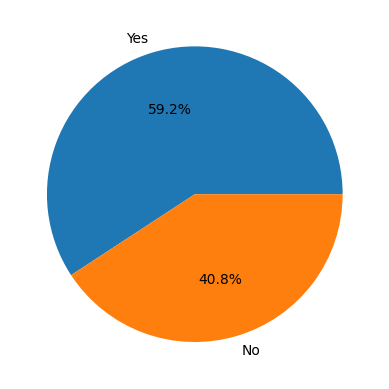

In [158]:
plt.pie(x=dataset['PaperlessBilling'].value_counts(),labels=['Yes','No'],autopct='%1.1f%%')

In [159]:
dataset['PaperlessBilling'].isnull().sum()

np.int64(0)

In [160]:
elder_bill = dataset.groupby('SeniorCitizen')['PaperlessBilling'].value_counts(normalize=True).unstack()
elder_bill

PaperlessBilling,No,Yes
SeniorCitizen,,
0,0.441620,0.558380
1,0.232925,0.767075


<Axes: xlabel='SeniorCitizen'>

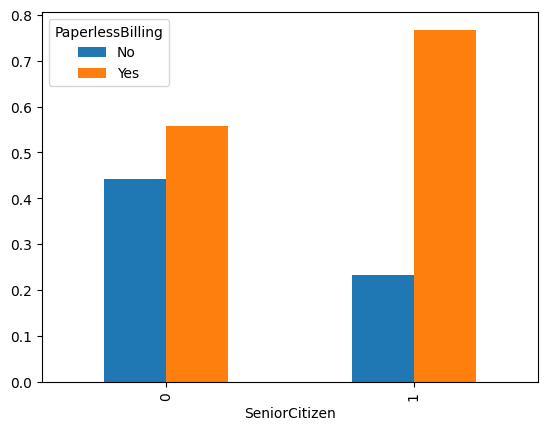

In [161]:
elder_bill.plot(kind='bar')

In [162]:
churn_bill = dataset.groupby('Churn')['PaperlessBilling'].value_counts().unstack()
churn_bill

PaperlessBilling,No,Yes
Churn,,
No,2403,2771
Yes,469,1400


<Axes: xlabel='Churn'>

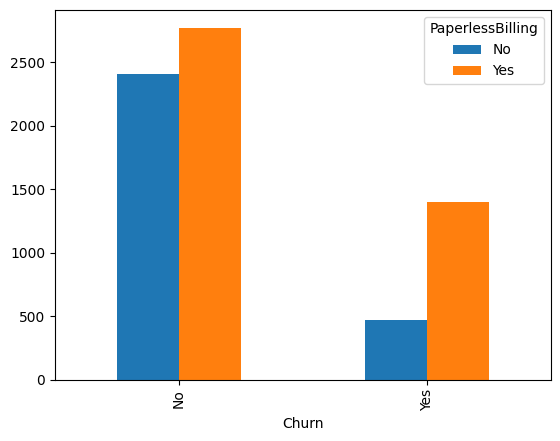

In [163]:
churn_bill.plot(kind='bar')

In [164]:
dataset.groupby('InternetService')['PaperlessBilling'].value_counts().unstack()

PaperlessBilling,No,Yes
InternetService,,
DSL,1091,1330
Fiber optic,701,2395
No,1080,446


<Axes: xlabel='InternetService'>

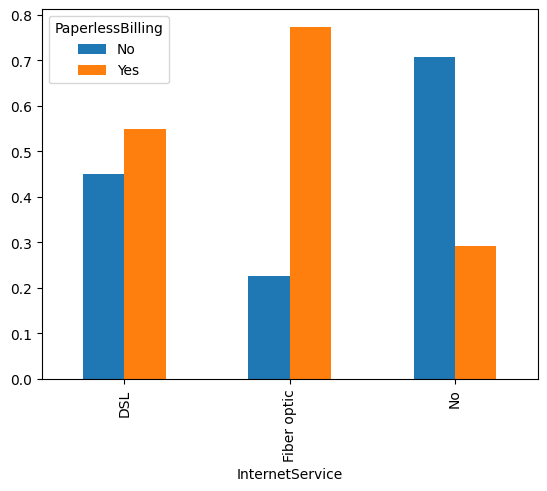

In [165]:
dataset.groupby('InternetService')['PaperlessBilling'].value_counts(normalize=True).unstack().plot(kind='bar')

<Axes: xlabel='Contract'>

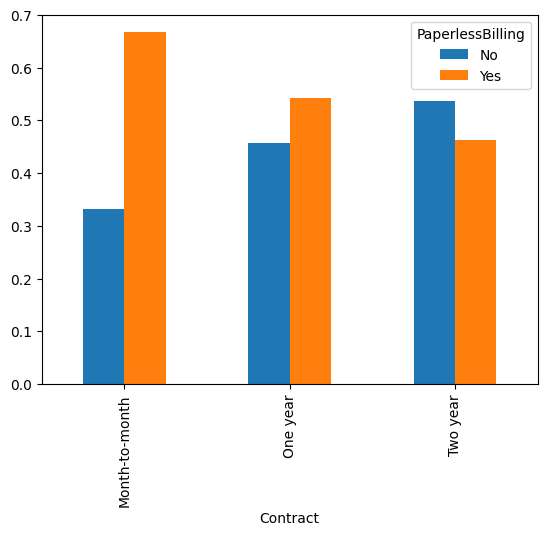

In [166]:
dataset.groupby('Contract')['PaperlessBilling'].value_counts(normalize=True).unstack().plot(kind='bar')

#### **Column Report - `PaperlessBilling`**
- **Data Type:** Object (String)
- **Unique Values:** `Yes` and `No`
- **Missing Values:** No missing values
- **Distribution Observations:** 
    - 60-40 Imbalance, 60 being `Yes`
    - Senior Citizen show a higher percentage for paperless billing
    - Customers with `Fiber Optics` have more paperless billings
    - Customers with monthly contracts are more likely to have `PaperlessBilling`
    - `Churn` rate not much affected by the type of billing 
- **Encoding:** Binary Encoding
- **Usefulness:** Doesn't seem to be directly correlated with `Churn` but not making early assumptions        
---

In [167]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### **Column - `PaymentMethod`**

In [168]:
dataset['PaymentMethod'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: PaymentMethod
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [169]:
dataset['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [189]:
dataset['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

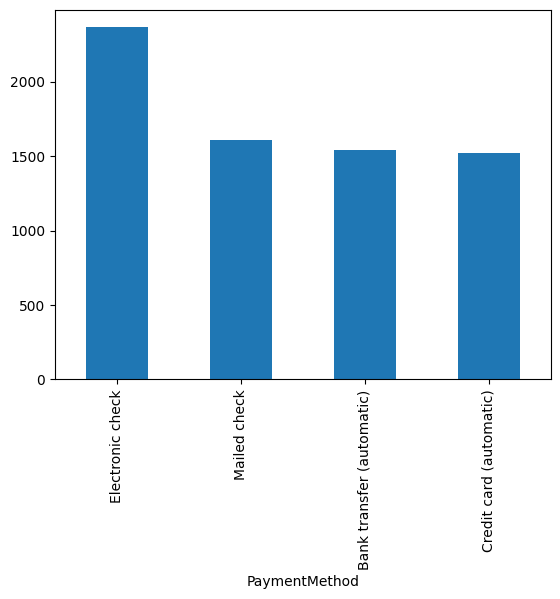

In [174]:
dataset['PaymentMethod'].value_counts().plot(kind='bar')
plt.show()

In [175]:
dataset['PaymentMethod'].isnull().sum()

np.int64(0)

In [ ]:
dataset.groupby('Churn')['PaymentMethod'].value_counts().unstack()

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,
No,1286,1290,1294,1304
Yes,258,232,1071,308


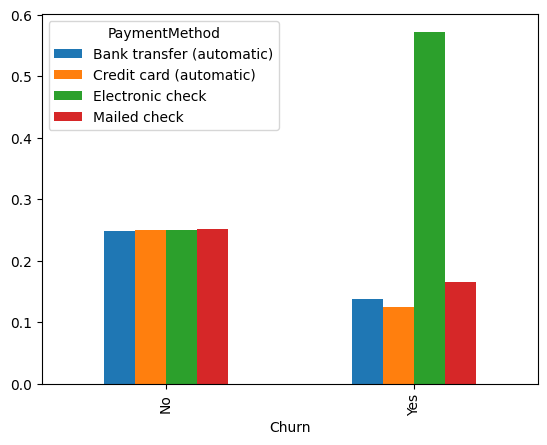

In [179]:
dataset.groupby('Churn')['PaymentMethod'].value_counts(normalize=True).unstack().plot(kind='bar')
plt.show()

In [180]:
dataset.groupby('PaperlessBilling')['PaymentMethod'].value_counts().unstack()

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
PaperlessBilling,,,,
No,653,640,623,956
Yes,891,882,1742,656


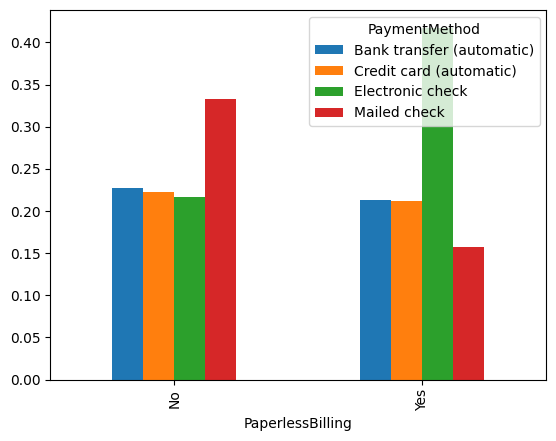

In [182]:
dataset.groupby('PaperlessBilling')['PaymentMethod'].value_counts(normalize=True).unstack().plot(kind='bar')
plt.show()

In [183]:
dataset.groupby('SeniorCitizen')['PaymentMethod'].value_counts().unstack()

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
SeniorCitizen,,,,
0,1311,1301,1771,1518
1,233,221,594,94


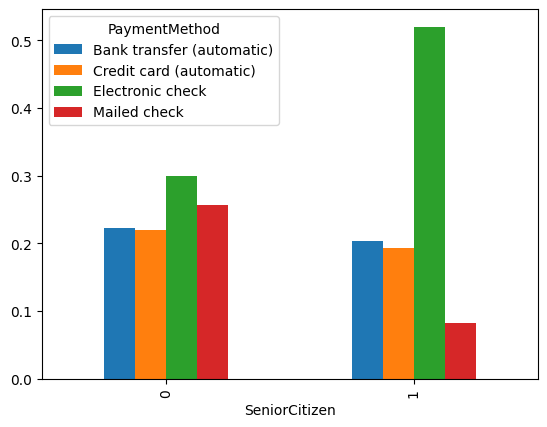

In [ ]:
dataset.groupby('SeniorCitizen')['PaymentMethod'].value_counts(normalize=True).unstack().plot(kind='bar')
plt.show()

In [186]:
dataset.groupby('InternetService')['PaymentMethod'].value_counts().unstack()

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
InternetService,,,,
DSL,566,594,648,613
Fiber optic,646,597,1595,258
No,332,331,122,741


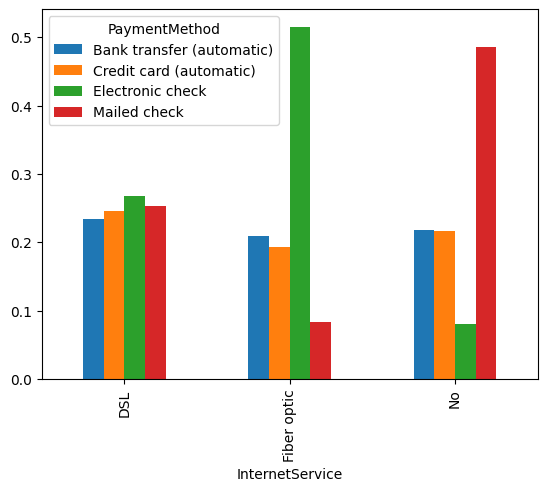

In [187]:
dataset.groupby('InternetService')['PaymentMethod'].value_counts(normalize=True).unstack().plot(kind='bar')
plt.show()

#### **Column Report - `PaymentMethod`**
- **Data Type:** Object (String)
- **Unique Values:** `Electronic Check`, `Bank Transfer (automatic)`, `Mailed Check`, `Credit Card (automatic)`
- **Imbalance:** No significant imbalance observed
- **Distribution Observations:**
    - Customers prefering `Electronic Check` (*~33%*) are slightly more in number
    - Amongst Churners, maximum percentage are customers who preferred `Electronic Checks`
    - Going by `InternetService`
        - The distribution for `DSL` is balanced 
        - The distribution for `No` prefers `Mailed Check` by a margin
        - The distribution for `Fiber optic` prefers `Electronic Check` by a margin
        - As already dicovered, there are more churners amongst customers having `Fiber optics`, and majority of these customers prefer `Electronic Check`.
        - Thus, this ties it all up to why customers who prefer `Electronic Check` are amongst the highest churners
- **Encoding:** One-Hot Encoding
---           

In [190]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### **Column - `MonthlyCharges`**

In [191]:
dataset['MonthlyCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: MonthlyCharges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [192]:
dataset['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ], shape=(1585,))

In [193]:
dataset['MonthlyCharges'].value_counts()

MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
42.40      1
97.90      1
116.40     1
31.65      1
39.05      1
Name: count, Length: 1585, dtype: int64

In [194]:
dataset['MonthlyCharges'].isnull().sum()

np.int64(0)

In [195]:
dataset['MonthlyCharges'].dtype

dtype('float64')

<Axes: ylabel='MonthlyCharges'>

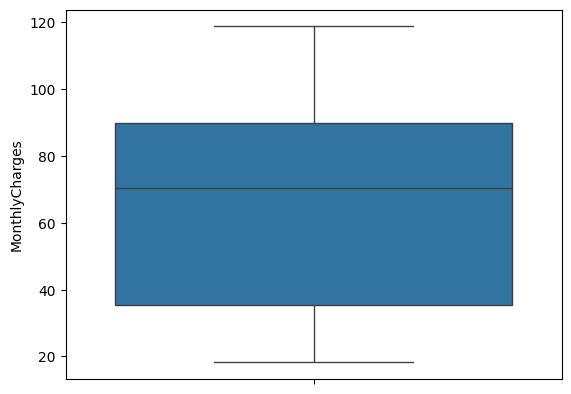

In [198]:
sns.boxplot(dataset['MonthlyCharges'])

In [199]:
dataset['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

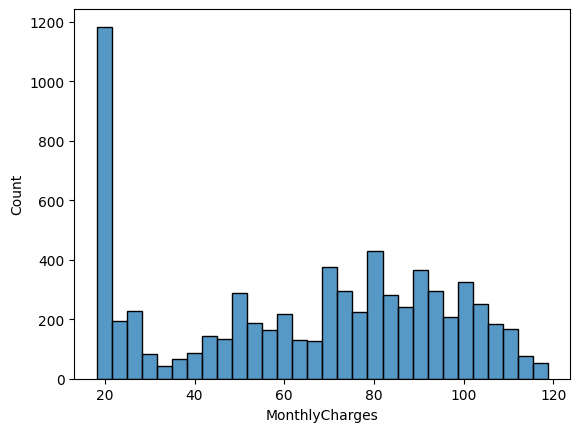

In [227]:
sns.histplot(data=dataset['MonthlyCharges'],bins=30)
plt.show()

In [217]:
def plot_kde(features,target):
    n_cols = 3
    n_rows = int(np.ceil(len(features) / 2))
    
    fig = plt.figure(figsize=(15,5*n_rows))
    
    for index, feature in enumerate(features):
        ax = fig.add_subplot(n_rows,n_cols,index + 1)
        for label in dataset[target].unique():
            sns.kdeplot(
                data=dataset[dataset[target] == label],
                x=feature,
                ax=ax,
                fill=True,
                label=label
            )
        ax.set_title(f"KDE of {feature} by {target}")            
        ax.legend(title=target, loc='upper right')
        
    plt.tight_layout()        
    return plt.show()         

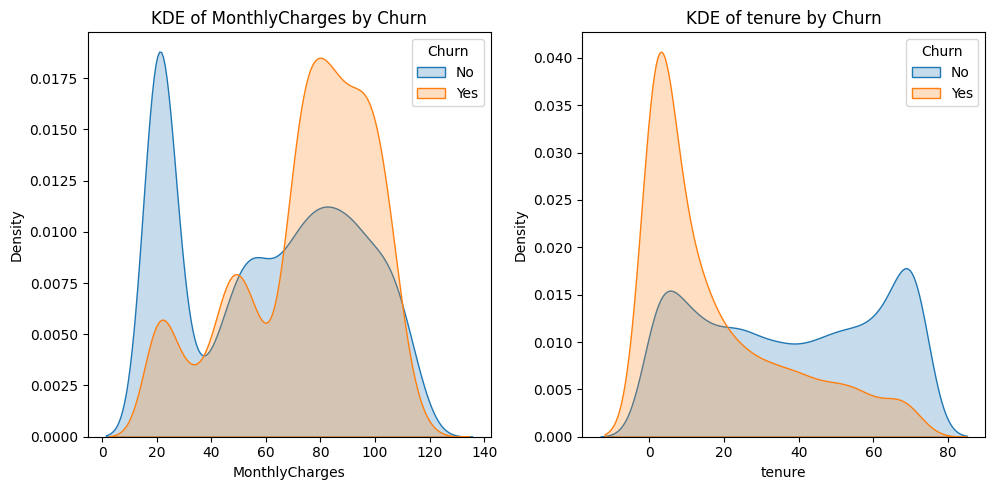

In [218]:
plot_kde(['MonthlyCharges','tenure'],'Churn')

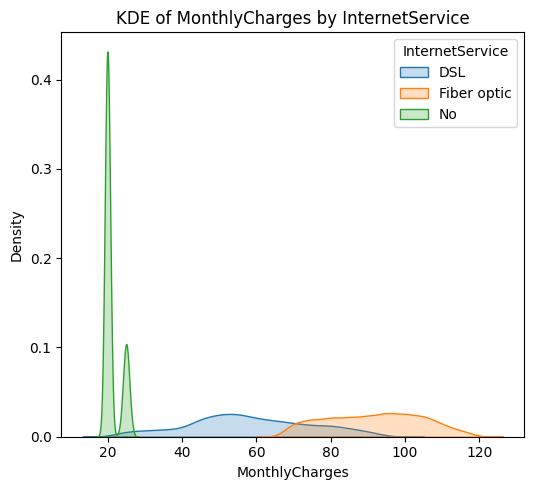

In [ ]:
plot_kde(['MonthlyCharges'],'InternetService')

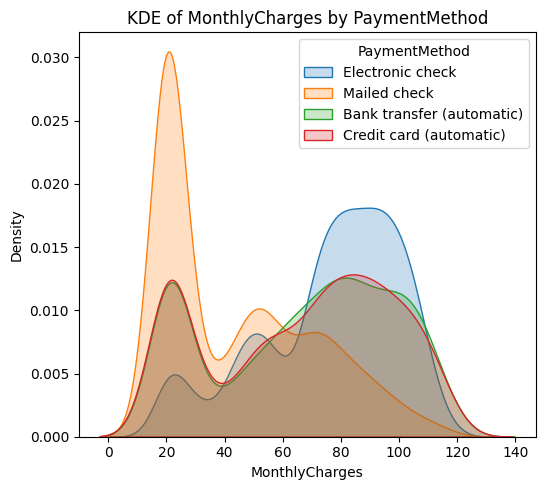

In [220]:
plot_kde(['MonthlyCharges'],'PaymentMethod')

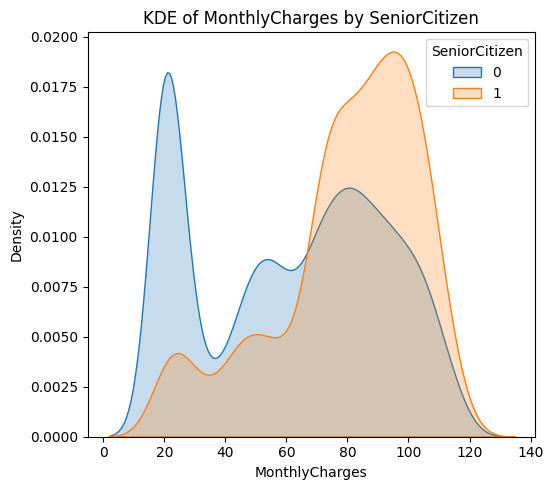

In [221]:
plot_kde(['MonthlyCharges'],'SeniorCitizen')

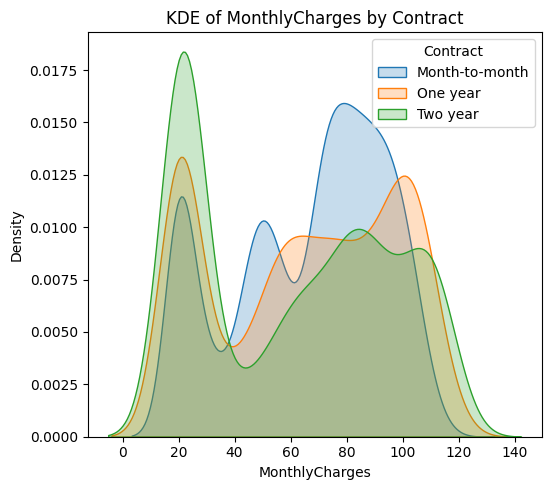

In [228]:
plot_kde(['MonthlyCharges'],'Contract')

#### **Column Report - `MonthlyCharges`**
- **Data Type:** float
- **Missing Values:** No missing values
- **Stats:**
    - Max: ~118$
    - Min: ~18$
    - Mean: ~64$
- **Standardization is necessary**
- **Distribution Observations:**
    - No outliers
    - Clustering at the low extreme
    - Customers with more `MonthlyCharges` have higher `Churn` rates (specifically in the range of 60-120$)
    - Customers with no `InternetService` have minimal charges
    - `DSL` having more charges followed by `Fiber optics` with the most charges
    - `Mailed Check` used by customers with relatively lower charges
- **Usefulness:** Is an important feature in relation with `Churn`     
---             

In [232]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### **Column - `TotalCharges`**

In [233]:
dataset['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [234]:
dataset['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      shape=(6531,), dtype=object)

In [235]:
dataset['TotalCharges'].value_counts()

TotalCharges
20.2      11
          11
19.75      9
19.65      8
19.9       8
          ..
1990.5     1
7362.9     1
346.45     1
306.6      1
108.15     1
Name: count, Length: 6531, dtype: int64

In [252]:
dataset[dataset['TotalCharges'].str.contains(' ')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [257]:
dataset.loc[dataset['TotalCharges'].str.strip() == '','TotalCharges'] = '0.0'

In [258]:
dataset[dataset['TotalCharges'].str.strip() == ''].shape[0]

0

In [245]:
dataset[dataset['TotalCharges'].str.contains(r'\$')].shape[0]

0

In [246]:
dataset['TotalCharges'].isnull().sum()

np.int64(0)

In [247]:
dataset[dataset['TotalCharges'].str.contains('.')].shape[0]

7043

In [260]:
dataset['TotalCharges'] = dataset['TotalCharges'].astype('float')

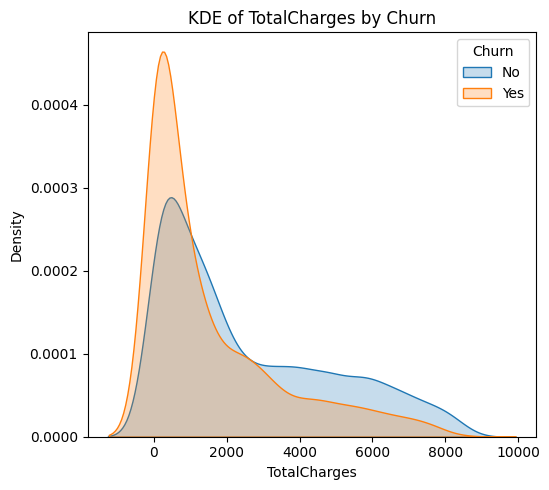

In [261]:
plot_kde(['TotalCharges'],'Churn')

In [262]:
dataset['TotalCharges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

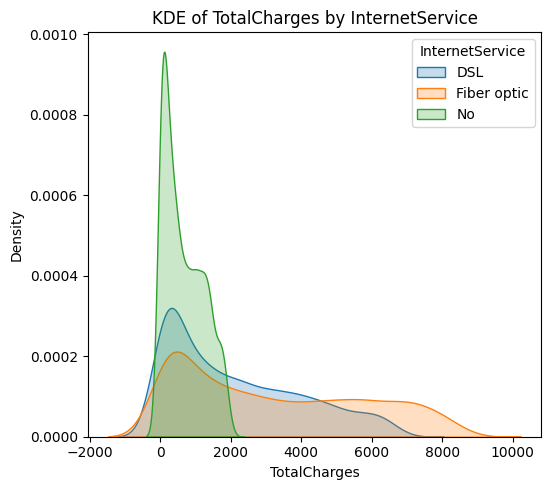

In [264]:
plot_kde(['TotalCharges'],'InternetService')

In [266]:
dataset[dataset['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


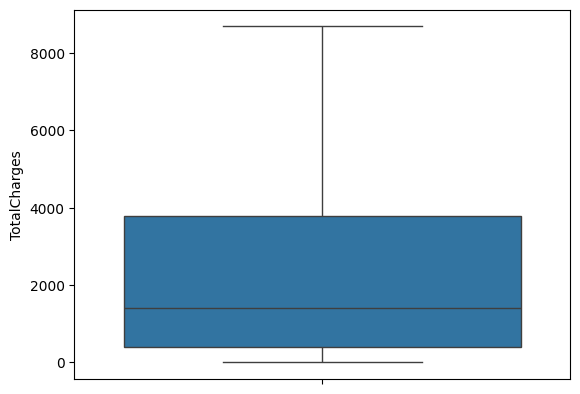

In [267]:
sns.boxplot(dataset['TotalCharges'])
plt.show()

In [270]:
dataset[['TotalCharges','MonthlyCharges','tenure']].corr()

,TotalCharges,MonthlyCharges,tenure
TotalCharges,1.000000,0.651174,0.826178
MonthlyCharges,0.651174,1.000000,0.247900
tenure,0.826178,0.247900,1.000000


In [274]:
(dataset['tenure'] * dataset['MonthlyCharges'] == dataset['TotalCharges']).value_counts()

False    6418
True      625
Name: count, dtype: int64

In [277]:
np.isclose(dataset['tenure'] * dataset['MonthlyCharges'], dataset['TotalCharges'], atol=1)

array([ True, False,  True, ..., False, False, False], shape=(7043,))

In [278]:
mismatched = dataset[~np.isclose(dataset['tenure'] * dataset['MonthlyCharges'], dataset['TotalCharges'], atol=1)]
mismatched

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


#### **Column Report - `TotalCharges`**
- **Data Type:** float
- **Missing Values:** 
    - 11 values with 0 `TotalCharges` and 0 `tenure`.
    - Drop them in the next stage as it is too early to decide if they will churn.  
- **Outliers:** No outliers
- **Standardization:** Needs to be standardized    
- **Distribution Observations:**
    - Large amount of churners with `TotalCharges` ~= *$2000*    
    - Customers with no `InternetService` have the least `TotalCharges`
    - `tenure` * `MonthlyCharges` not necessarily equal to `TotalCharges`,
        - Therefore, cannot drop this feature directly
        - This might be due to offers, discounts, etc.
    - Correlations:
        - `tenure` x `TotalCharges` ~= 82%        
        - `MonthlyCharges` x `TotalCharges` ~= 65%
    - `TotalCharges` vs `Churn` is right skewed for both `Yes` and `No`
        - Suggests more early churners
        - Longer the tenure, the customer is less likely to churn
---                             

#### **Column - `Churn`**

In [279]:
dataset['Churn'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Churn
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [280]:
dataset['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [284]:
dataset['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [285]:
dataset['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

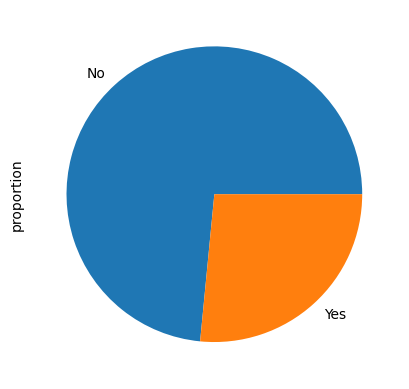

In [ ]:
dataset['Churn'].value_counts(normalize=True).plot(kind='pie')

#### **Column Report - `Churn`**
- **Data Type:** Object (String)
- **Unique Values:** `Yes` and `No`
- **Missing Values:** No missing values
- **Imbalance:** 
    - There is a 74-26 imbalance with `No` being ~74%
    - False negatives are more costly here
    - If a customer is likely to churn and model reports otherwise, this will be a loss to the company
    - Thereby, lean towards using Recall or F1-score  
- **Encoding:** Binary Encode (0,1)
---        

### **Exploratory Data Analysis - `Complete`**
---